In [2]:
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [3]:
# import the necessary packages 
from tensorflow.keras.layers import Input, GlobalAveragePooling2D

# Normal libraries
import pandas as pd
import numpy as np
import os
import shutil

# pickle
import pickle as pk
#import cv2

#
from IPython.display import Image

# visualization libraries
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# sklearn tensorflow.keras  libraries
from tensorflow.keras.models  import Sequential, load_model
from tensorflow.keras  import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import binary_crossentropy, categorical_crossentropy, Accuracy
from tensorflow.keras import optimizers



In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.utils import to_categorical



In [5]:
data_class_df = pd.read_csv('/Users/amateos88/code/vivekptl9/Anaemia_Classification/sample_dataset/sickle_slides_new_march.txt')
data_class_df.shape

(161, 2)

In [6]:
with open('/Users/amateos88/Desktop/Anaemia/pictures_array.npy', 'rb') as f:
    images = np.load(f)

In [7]:
with open('/Users/amateos88/Desktop/Anaemia/labels_array.npy', 'rb') as f:
    labels = np.load(f)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3)

In [9]:
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
base_model.summary()

2022-09-05 15:19:09.429461: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-05 15:19:09.430854: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-05 15:19:09.431827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 aliza

In [10]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x) #init
x = Dense(32, activation= 'relu')(x) #init
x = Dense(128, activation= 'relu')(x)
x = Dense(128, activation='relu')(x) 
x = Dense(256, activation='relu')(x) 
x = Dense(512, activation='relu')(x)
x = Dense(1028, activation='relu')(x)
x = Dense(2056, activation='relu')(x)
# # x = Dense(1028, activation='relu')(x)
# # x = Dense(1028, activation='relu')(x)
# # x = Dense(2056, activation='relu')(x)
# # x = Dense(1028, activation='relu')(x)
# # x = Dense(512, activation='relu')(x)
# # x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x) #init
predictions = Dense(1, activation='sigmoid')(x)

# # let's define the input tensor
 #input_tensor = Input(shape=(224, 224, 3))

# # this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
for layer in base_model.layers:
      layer.trainable = False


In [12]:
#adam_opt = optimizers.Adam(learning_rate=0.088, beta_1=0.9, beta_2=0.95)
model.compile(loss='binary_crossentropy',
              optimizer= 'Adam',
              metrics= 'accuracy')

In [13]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=15,  # Use early stopping in practice
                    batch_size=64, 
                    validation_split= 0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/15


2022-09-05 15:19:21.381878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 0.6383 - accuracy: 0.6289

2022-09-05 15:19:32.134435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 18s 644ms/step - loss: 0.6383 - accuracy: 0.6289 - val_loss: 0.6404 - val_accuracy: 0.6274
Epoch 2/15
17/17 [==============================] - 5s 269ms/step - loss: 0.5765 - accuracy: 0.7031 - val_loss: 0.5119 - val_accuracy: 0.8061
Epoch 3/15
17/17 [==============================] - 5s 285ms/step - loss: 0.4895 - accuracy: 0.7583 - val_loss: 0.4484 - val_accuracy: 0.8099
Epoch 4/15
17/17 [==============================] - 4s 218ms/step - loss: 0.4476 - accuracy: 0.7897 - val_loss: 0.4755 - val_accuracy: 0.8099
Epoch 5/15
17/17 [==============================] - 4s 223ms/step - loss: 0.4487 - accuracy: 0.7888 - val_loss: 0.5392 - val_accuracy: 0.7567
Epoch 6/15
17/17 [==============================] - 4s 245ms/step - loss: 0.4651 - accuracy: 0.7593 - val_loss: 0.4653 - val_accuracy: 0.7262
Epoch 7/15
17/17 [==============================] - 4s 223ms/step - loss: 0.3690 - accuracy: 0.8183 - val_loss: 0.5561 - val_accuracy: 0.7605
Epoch 8/15
17/17

In [14]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 4s 139ms/step - loss: 0.3509 - accuracy: 0.8457


[0.3508518636226654, 0.8457447290420532]

In [15]:

model.save('/Users/amateos88/code/vivekptl9/Anaemia_Classification/Model/Inc_xx_deploy.pk')

2022-09-05 15:20:47.348131: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/amateos88/code/vivekptl9/Anaemia_Classification/Model/Inc_xx_deploy.pk/assets


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

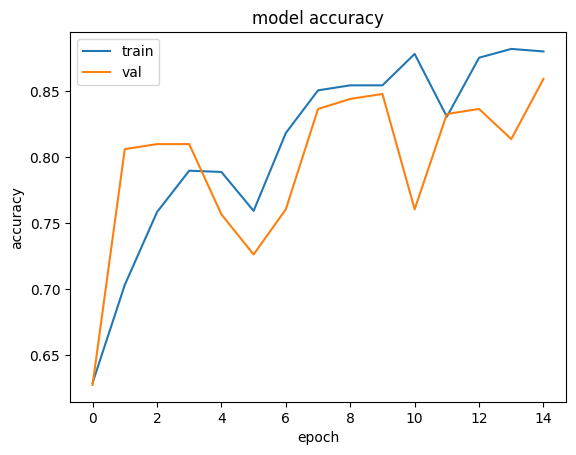

In [17]:
def accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    return plt.show()

accuracy_plot(history)

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

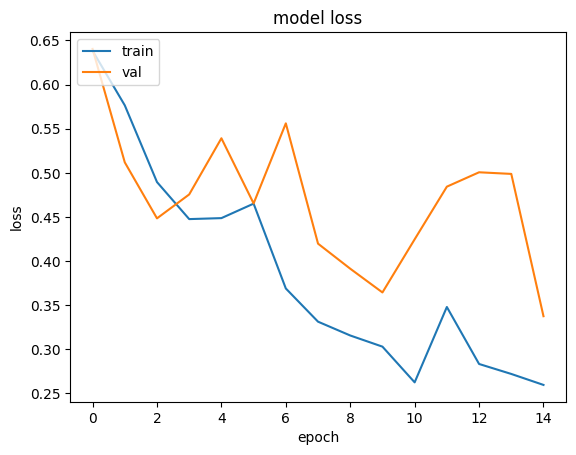

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
# prediction